[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tesouro/curso_basico_python/blob/main/Aula%209%20-%20Automação%20de%20relatórios.ipynb)

# Aula 9 - Automação de relatórios
<div class="alert alert-block alert-info" style="border-left: 5px solid #0056b3;">
    <h4>🎯 Objetivos de Aprendizagem da Aula</h4>
    <ul style="margin-left: 20px;">
    <li>O que é a biblioteca docxtemplate?</li>
    <li>Como substituir variáveis</li>    
    <li>Como fazer loops (para preenchimento de tabelas e textos)</li>
    <li>Como colocar imagens</li>
    <li>Como fazer relatórios a partir de dados de APIs</li>
    </ul>
</div>

## 1. Breve Contextualização sobre automação de relatórios
No Tesouro Nacional, há a produção recorrente de diversos relatórios (por força de lei ou para fins de transparência) que possuem, sempre, o mesmo formato, mas com dados diferentes.

Esses relatórios, muitas vezes, possuem um esforço operacional significativo para realização: servidores comumente gastam dias coletando dados, manipulando-os no Excel e reescrevendo o documento novo.

Pois bem, existe um jeito automatizado de fazer isso!
1) Podemos usar APIs para puxar os dados para o Python (aula 7)
2) Podemos manipulá-los com Pandas (aula 6)
3) Podemos gerar gráficos com o Seaborn (aula 8)
4) Podemos colocar tudo em um template padronizado (que vamos aprender agora, na aula 9)

## 1.1. O que é o docxtpl?

Pense no docxtpl como uma "mala direta" superpoderosa para seus documentos Word, controlada por Python. A ideia central é muito simples:

- Template: Você cria um documento Word (.docx) normal, que servirá como seu modelo. Nos locais onde você quer que a informação dinâmica apareça, você insere marcadores especiais, como {{ nome_da_variavel }} ou {% for item in lista %}.

- Contexto: No seu script Python, você reúne todos os dados que deseja inserir no documento (textos, números, listas, etc.) dentro de um dicionário. Esse dicionário é chamado de "contexto".

- Renderização: Você usa o docxtpl para carregar o gabarito (template), entrega o dicionário de contexto a ele e chama o método .render(). A biblioteca então lê o gabarito, substitui todos os marcadores pelos dados do seu contexto e gera um novo arquivo .docx, que é o seu relatório final e preenchido.

O grande poder disso? Qualquer mudança nos dados de origem (uma planilha, um banco de dados) pode gerar um relatório complexo e atualizado com a execução de um único script, eliminando erros manuais e economizando um tempo precioso.

In [ ]:
!pip install docxtpl docx -q

### 1.2. Demonstração - Substituição de variáveis
Imagine que temos os seguintes dados de uma análise de pleitos, já processados em Python:

In [ ]:
# Dados para os exercícios
dados_pleito = {
    'numero_processo': '01234.567890/2025-11',
    'interessado': 'Município de Rio Brilhante - MS',
    'valor_pleito': 2500000.00,
    'status_final': 'DEFERIMENTO',
    'analista_responsavel': 'Fulano de Tal'
}

No Word: abra o documento template_despacho.docx. Ele deve ter a estrutura a seguir:
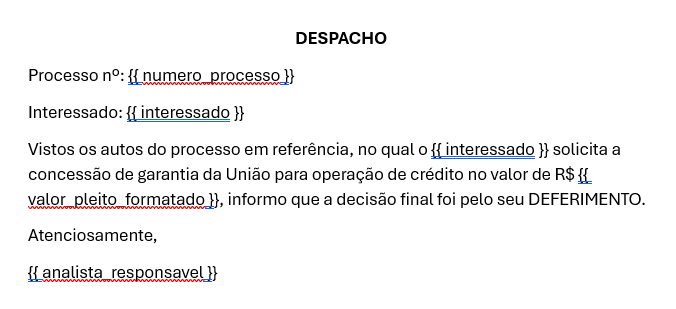

Vamos colocar esses dados dentro de suas respectivas variáveis e exportar o arquivo preenchido.

**P.S. Note que você não pode estar com o arquivo aberto na hora de rodar o código!**

In [ ]:
# Importa a classe principal da biblioteca
from docxtpl import DocxTemplate

# 1. Dados de origem (exatamente como no exercício)
dados_pleito = {
    'numero_processo': '01234.567890/2025-11',
    'interessado': 'Município de Rio Brilhante - MS',
    'valor_pleito': 2500000.00,
    'status_final': 'DEFERIMENTO',
    'analista_responsavel': 'Fulano de Tal',
}

# 2. Carrega o gabarito do Word
doc = DocxTemplate("template_despacho.docx")

# 3. Preparação e Criação do Contexto
# Esta é a etapa crucial de "tradução" dos dados para o gabarito.

# Primeiro, formatamos o número para o padrão brasileiro.
valor_formatado = f"{dados_pleito['valor_pleito']:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
# O resultado será a string "2.500.000,00"

# Agora, montamos o dicionário de contexto com as chaves exatas que o Word espera.
context = {
    'numero_processo': dados_pleito['numero_processo'],
    'interessado': dados_pleito['interessado'],
    'valor_pleito_formatado': valor_formatado,  # Usamos a variável formatada!
    'analista_responsavel': dados_pleito['analista_responsavel'],
    'status_final': dados_pleito['status_final']
}

# 4. Renderiza o documento com os dados do contexto
doc.render(context)

# 5. Salva o novo arquivo final preenchido
doc.save("despacho_final.docx")

print("Arquivo 'despacho_final.docx' gerado com sucesso!")

Abra a pasta correspondente e veja o arquivo gerado (despacho_final.docx)

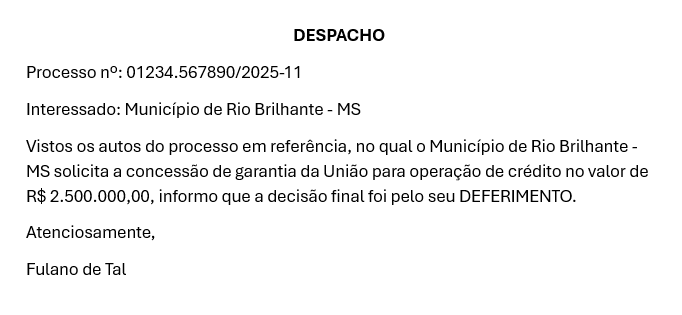

Alguns detalhes que valem a pena ressaltar:
- Toda a formatação do arquivo word feita no template é herdada para o relatório final;
- O nome das variáveis no documento word precisam ser **exatamente as mesmas** no "context". 

### 1.3. Loops em tabelas e textos
O exemplo acima é muito útil para substituir variáveis de modo pareado: uma variável no word para uma variável no Python. 

No entanto, muitas vezes deseja-se colocar tabelas inteiras no documento e colocar uma por uma seria inviável. Felizmente, a biblioteca possui uma sintaxe para fazermos loops.

Abra o arquivo template_tabelas_e_figuras

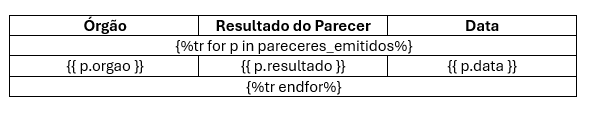

A sintaxe do loop é: 
- {%tr for p in pareceres_emitidos%} > inicia o loop e cria uma variável de iteração em `p`, gerando uma linha (tr) por iteração. (deve ser colocado em uma linha mesclada no início da tabela)
- p.orgao > pega a coluna `orgao` dentro da linha atual
- p.resultado > pega a coluna `resultado` dentro da linha atual
- p.data > pega a coluna `data` dentro da linha atual
- {%tr endfor%} > finaliza o loop (deve ser colocado em uma linha mesclada no final da tabela)

In [ ]:
# Importa a classe principal da biblioteca
from docxtpl import DocxTemplate

# 1. Dados de origem (são os mesmos de antes)
dados_pleito['pareceres_emitidos'] = [ 
        {'orgao': 'STN', 'resultado': 'favorável', 'data': '15/07/2025'},
        {'orgao': 'PGFN', 'resultado': 'favorável com ressalvas', 'data': '30/07/2025'},
        {'orgao': 'GABIN', 'resultado': 'deferido', 'data': '05/08/2025'}
    ]

# 2. Carrega o NOVO gabarito, aquele que tem a tabela
doc = DocxTemplate("template_tabelas_e_figuras.docx")

# 3. Adiciona o contexto
context = {
    'pareceres_emitidos': dados_pleito['pareceres_emitidos']
}

# 4. Renderiza o documento
# O método render() vai ver o `for` no gabarito e criar as 3 linhas na tabela automaticamente.
doc.render(context)

# 5. Salva o novo arquivo final
doc.save("tabela_preenchida.docx")

print("Arquivo 'despacho_com_tabela.docx' gerado com sucesso!")

A saída deve ser a seguinte:

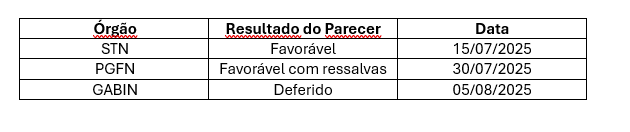

Uma sintaxe parecida pode ser usada para fazer loops dentro de textos, em vez de criar linhas dentro de tabelas:

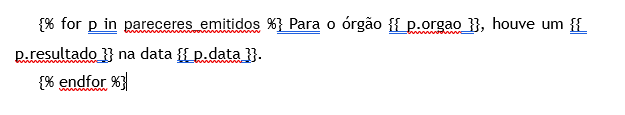

Rodando o mesmo código, obtém-se:

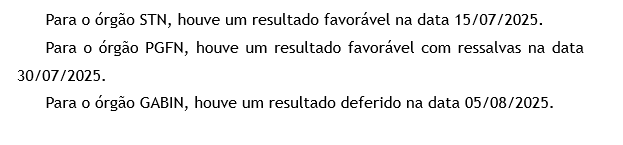

### 1.4. Condicionais

Além de loops, também é possível estabelecer lógica condicional dentro do relatório:
- Se algo for verdade, escreva X;
- Se algo não for verdade, escreva Y.

A sintaxe é a seguinte: 
- {% if condicao_1 %} > se isso for verdade, o texto seguinte será preenchido;
- {% elif condicao_2 %} > se não a condição 1 não for verdade e a condição 2 for, o texto seguinte será preenchido;
- {% else %} NORMAL: > se nenhuma das condições acima for verdade, o texto seguinte será preenchido.

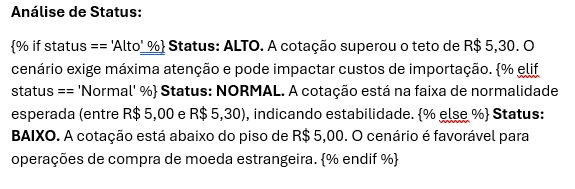

In [ ]:
# Importar a ferramenta necessária
from docxtpl import DocxTemplate

# --- Parte I: A Lógica da Decisão ---

# Altere este valor para testar os três cenários (ex: 4.95, 5.15, 5.35)
cotacao_recente_simulada = 4.95

# A lógica if/elif/else do Python para determinar o status
if cotacao_recente_simulada > 5.30:
    status_dolar = 'Alto'
elif cotacao_recente_simulada >= 5.00:
    status_dolar = 'Normal'
else:
    status_dolar = 'Baixo'

print(f"Cotação simulada: R$ {cotacao_recente_simulada:.2f}")
print(f"O status enviado para o Word será: '{status_dolar}'")

# --- Parte II: Montagem do Relatório ---

print("\nMontando o documento Word com a lógica elif...")
doc = DocxTemplate("template_condicional.docx")

# O contexto envia a cotação e a string de status já decidida
context = {
    'cotacao_recente': f"{cotacao_recente_simulada:.4f}",
    'status': status_dolar  # Esta chave corresponde à variável no gabarito
}

doc.render(context)
nome_arquivo_final = 'relatorio_condicional.docx'
doc.save(nome_arquivo_final)

print(f"Sucesso! Relatório salvo como '{nome_arquivo_final}'.")

O resultado está presente no arquivo `relatorio_condicional.docx`:

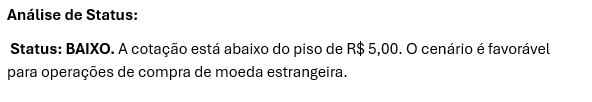

### 1.4. Substituição de imagens
Além de textos, o docxtpl também permite a substituição de imagens no documento.
Vamos ver como colocar uma imagem local (no caso, `teste_grafico.png`)

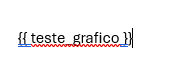

In [ ]:
# Passo 1: Importar as ferramentas necessárias do docxtpl
from docxtpl import DocxTemplate, InlineImage
from docx.shared import Mm # Para definir o tamanho da imagem em milímetros

# Passo 2: Carregar o gabarito do Word
# O script espera que 'gabarito_imagem.docx' esteja na mesma pasta.
print("Carregando o gabarito 'gabarito_imagem.docx'...")
doc = DocxTemplate("template_tabelas_e_figuras.docx")

# Passo 3: Criar o objeto InlineImage a partir do arquivo existente
# O script lê 'teste_grafico.png' e o prepara para inserção.
# A imagem será inserida com uma largura de 150mm.
print("Lendo 'teste_grafico.png' e preparando para inserção...")
grafico = InlineImage(doc, 'teste_grafico.png', width=Mm(150))

# Passo 4: Montar o dicionário de contexto
# A chave 'teste_grafico' deve ser exatamente a mesma do gabarito.
# O valor é o objeto 'grafico' que criamos.
context = {
    'teste_grafico': grafico
}

# Passo 5: Renderizar o documento e salvar o resultado
print("Renderizando o documento e salvando como 'relatorio_com_grafico.docx'...")
doc.render(context)
doc.save("relatorio_com_grafico_local.docx")

print("\nProcesso concluído com sucesso!")

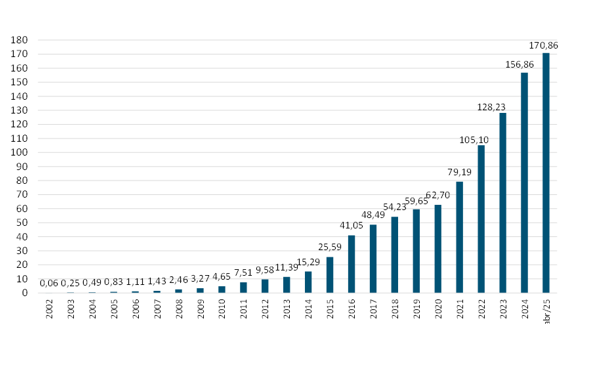

Além de funcionar com gráfico pré-prontos, também é possível gerar um gráfico dinamicamente no Python (usando a biblioteca Seaborn, por exemplo):

In [ ]:
# Passo 1: Importar as ferramentas, incluindo a biblioteca 'io'
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io  # A biblioteca para manipulação de dados em memória
from docxtpl import DocxTemplate, InlineImage
from docx.shared import Mm

print("Iniciando o processo de geração de relatório (versão em memória)...")

# --- Parte I: Análise e Visualização de Dados ---

# Passo 2: Gerar dados aleatórios (sem alterações)
print("Gerando dados aleatórios...")
dados = {
    'Regional': ['Regional A', 'Regional B', 'Regional C', 'Regional D'],
    'Vendas (em milhões)': np.random.uniform(10, 50, size=4)
}
df = pd.DataFrame(dados)

# Passo 3: Criar o gráfico com Seaborn (sem alterações)
print("Criando o gráfico com Seaborn...")
plt.figure(figsize=(8, 5))
sns.barplot(x='Regional', y='Vendas (em milhões)', data=df, palette='plasma')
plt.title('Desempenho de Vendas por Regional')
plt.tight_layout()

# Passo 4: Salvar o gráfico diretamente na memória (A GRANDE MUDANÇA)
# Criamos um "arquivo virtual" na memória RAM
image_stream = io.BytesIO()

# Pedimos ao matplotlib para salvar o gráfico nesse arquivo virtual, no formato PNG
plt.savefig(image_stream, format='png')
plt.close() # Boa prática para liberar a memória da figura

# Após salvar, o "cursor" do nosso arquivo virtual está no final.
# Precisamos rebobiná-lo para o início para que o docxtpl possa lê-lo.
image_stream.seek(0)
print("Gráfico gerado e armazenado com sucesso na memória.")


# --- Parte II: Automação do Documento ---

# Passo 5: Preparar e montar o documento Word
print("Iniciando a montagem do documento Word...")
doc = DocxTemplate("template_tabelas_e_figuras.docx")

# Cria o objeto InlineImage, passando o fluxo de bytes da memória diretamente
# O docxtpl é inteligente o suficiente para ler a imagem da memória
grafico_para_doc = InlineImage(doc, image_stream, width=Mm(160))

# Monta o contexto
context = {
    'teste_grafico': grafico_para_doc
}

# Renderiza e salva o documento final
doc.render(context)
nome_arquivo_final = 'relatorio_com_grafico_seaborn.docx'
doc.save(nome_arquivo_final)
print(f"Documento final '{nome_arquivo_final}' criado com sucesso.")

# Passo 6: Limpeza
# Não há o que limpar! Nenhum arquivo temporário foi criado no disco.

print("\nProcesso concluído de forma limpa e eficiente!")

### 1.5. Gerando relatórios a partir de dados de APIs

O código abaixo busca dados de uma API, trata os dados com Pandas, gera textos a partir de variáveis calculadas e imagens no Seaborn.

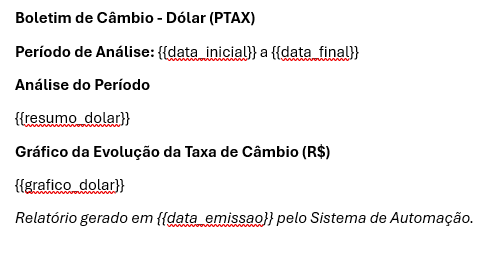

In [ ]:
# Passo 1: Importar todas as ferramentas, incluindo datetime para lidar com datas
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io
from datetime import datetime, timedelta
from docxtpl import DocxTemplate, InlineImage
from docx.shared import Mm

print("Iniciando pipeline de geração do Boletim de Câmbio...")

# --- Parte I: Coleta e Tratamento de Dados (BCB API + Pandas) ---

try:
    # Passo 2: Definir o período e buscar os dados da API do Banco Central
    print("Buscando dados da API do Banco Central do Brasil...")
    data_final_dt = datetime.now()
    data_inicial_dt = data_final_dt - timedelta(days=90) # Analisaremos os últimos 90 dias

    # Formatando as datas para o padrão que a API espera (dd/MM/yyyy)
    data_inicial_str = data_inicial_dt.strftime('%d/%m/%Y')
    data_final_str = data_final_dt.strftime('%d/%m/%Y')

    # O código '1' corresponde à série "Dólar americano (venda) - PTAX"
    codigo_serie_bcb = '1'
    url = (
        f'https://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo_serie_bcb}/dados?'
        f'formato=json&dataInicial={data_inicial_str}&dataFinal={data_final_str}'
    )

    response = requests.get(url, verify=False)  # Desabilita verificação SSL (não recomendado para produção)
    response.raise_for_status()  # Gera um erro se a requisição falhar

    # Passo 3: Tratar os dados com Pandas
    print("Tratando os dados da série temporal...")
    df = pd.DataFrame(response.json())
    
    # Limpeza e conversão de tipos
    df['valor'] = pd.to_numeric(df['valor'])
    df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y')
    df = df.rename(columns={'valor': 'taxa_compra_ptax'}) # Renomeando para clareza

    # Cálculos para o relatório
    cotacao_maxima = df['taxa_compra_ptax'].max()
    cotacao_minima = df['taxa_compra_ptax'].min()
    cotacao_media = df['taxa_compra_ptax'].mean()
    cotacao_recente = df['taxa_compra_ptax'].iloc[-1] # Pega o último valor da série

    # --- Parte II: Geração de Conteúdo Dinâmico (Textos e Gráfico) ---

    # Passo 4: Gerar o texto dinâmico para o resumo
    print("Gerando texto dinâmico com os indicadores...")
    resumo_texto = (
        f"Nos últimos 90 dias, a cotação do Dólar (PTAX Compra) apresentou uma volatilidade significativa. "
        f"A taxa atingiu um valor máximo de R$ {cotacao_maxima:.4f} e um mínimo de R$ {cotacao_minima:.4f}. "
        f"A média para o período foi de R$ {cotacao_media:.4f}. "
        f"A cotação mais recente registrada foi de R$ {cotacao_recente:.4f}."
    )

    # Passo 5: Gerar a imagem do gráfico com Seaborn (em memória)
    print("Gerando gráfico de linha com Seaborn...")
    plt.figure(figsize=(10, 5))
    sns.lineplot(x='data', y='taxa_compra_ptax', data=df, marker='o')
    plt.title('Evolução da Cotação do Dólar (PTAX Compra) - Últimos 90 Dias')
    plt.xlabel('Data')
    plt.ylabel('Taxa de Câmbio (R$)')
    plt.xticks(rotation=30) # Rotaciona as datas no eixo X para melhor leitura
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    
    image_stream = io.BytesIO()
    plt.savefig(image_stream, format='png')
    plt.close()
    image_stream.seek(0)

    # --- Parte III: Montagem do Relatório Final (docxtpl) ---

    # Passo 6: Montar e renderizar o documento Word
    print("Montando o relatório final no Word...")
    doc = DocxTemplate("template_api.docx")
    context = {
        'data_inicial': data_inicial_str,
        'data_final': data_final_str,
        'resumo_dolar': resumo_texto,
        'grafico_dolar': InlineImage(doc, image_stream, width=Mm(150)),
        'data_emissao': datetime.now().strftime('%d/%m/%Y %H:%M:%S')
    }
    doc.render(context)
    nome_arquivo_final = 'relatorio_api.docx'
    doc.save(nome_arquivo_final)

    print(f"\nSucesso! Pipeline concluído. Boletim salvo como '{nome_arquivo_final}'.")

except requests.exceptions.RequestException as e:
    print(f"Erro ao acessar a API do BCB: {e}")
except Exception as e:
    print(f"Ocorreu um erro inesperado: {e}")

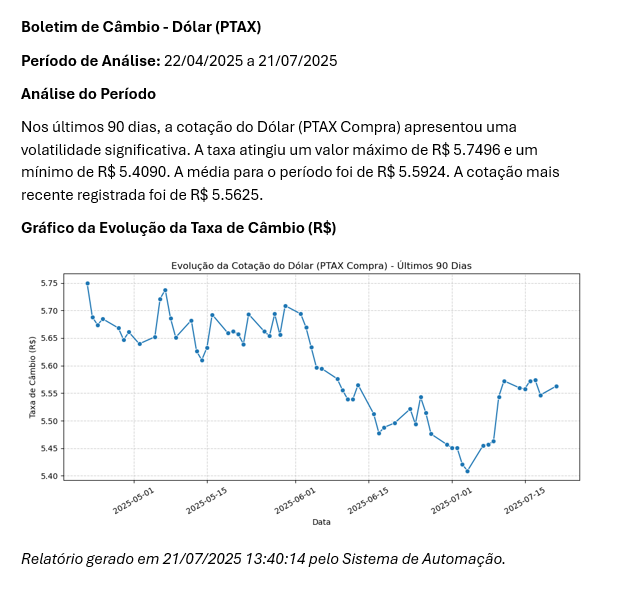

Alguns detalhes importantes:

- Note que uma variável no word pode conter um texto comprido com diversas variáveis no Python, como a variável `resumo_dolar`.
- Perceba o uso da biblioteca `datetime` para pegar o dia atual (no momento da execução do código) 

## 2. Exercícios

1) Crie um script que preencha uma nota de despacho. Para tal, crie um template docx com os seguintes dados:

**DESPACHO**

Processo: {{ numero_processo }}

Assunto: {{ assunto }}

Encaminho os autos para análise e parecer do setor responsável.

Atenciosamente,

{{ nome_analista }}

{{ cargo_analista }}

In [1]:
from docxtpl import DocxTemplate

# 1. Carrega o template que acabamos de criar.
doc = DocxTemplate("template_despacho.docx")

# 2. Define o dicionário de 'contexto' com os dados a serem inseridos.
# As chaves do dicionário devem ser IDÊNTICAS aos nomes dentro das chaves {{ }} no Word.
contexto = {
    'numero_processo': '0123.456789/2025-01',
    'assunto': 'Solicitação de Acesso à Informação',
    'nome_analista': 'José da Silva',
    'cargo_analista': 'Analista de Controle Externo'
}

# 3. Renderiza o documento, substituindo os marcadores pelos valores do contexto.
doc.render(contexto)

# 4. Salva o resultado em um novo arquivo .docx.
doc.save("despacho_final_exercicio.docx")

print("Arquivo 'despacho_final_exercicio.docx' gerado com sucesso!")

Arquivo 'despacho_final_exercicio.docx' gerado com sucesso!


2) Gere um script que preencha uma tabela com uma lista de ativos financeiros.

In [2]:
from docxtpl import DocxTemplate

# 1. Carrega o template da tabela.
doc = DocxTemplate("template_ativos.docx")

# 2. Define o contexto. A chave 'lista_ativos' corresponde ao nome que usamos no loop do Word.
# O valor é uma lista de dicionários.
contexto = {
    'lista_ativos': [
        {'ticker': 'PETR4', 'qtd': 100, 'valor': '3.850,00'},
        {'ticker': 'VALE3', 'qtd': 50, 'valor': '3.210,00'},
        {'ticker': 'ITUB4', 'qtd': 200, 'valor': '6.600,00'},
    ]
}

# 3. Renderiza o documento. O docxtpl irá iterar sobre 'lista_ativos' e criar uma linha para cada item.
doc.render(contexto)

# 4. Salva o novo arquivo.
doc.save("relatorio_ativos_final.docx")

print("Arquivo 'relatorio_ativos_final.docx' gerado com sucesso!")

Arquivo 'relatorio_ativos_final.docx' gerado com sucesso!


## 3. Projeto Final
Faça um projeto final que integra todo o seu conhecimento!

Objetivo: Criar um relatório de uma página que busca algum dado via API, faz cálculos com Pandas e gera um gráfico com Seaborn.

Use o exemplo acima como inspiração e o GitHub do projeto Pyrel: https://github.com/tesouro/pyrel

Use o modelo como base para o seu projeto final: https://github.com/tesouro/curso_basico_python/tree/main/projeto_final

## 4. Perguntas para discussão em grupo

1) Quais são as vantagens do uso do Python para automação de relatórios?

2) Nosso projeto gera um relatório a partir de um template .docx. O que acontece se, no futuro, o departamento pedir para gerar o mesmo relatório em 5 layouts diferentes (com logos diferentes, ordens de seção diferentes, etc.)? É mais vantajoso ter 5 templates .docx ou modificar o código Python? Quais os prós e contras de cada abordagem?

3) O nosso pipeline confia cegamente nos dados da API. O que poderia dar errado? Que tipo de validações ou blocos try/except poderíamos adicionar ao nosso código Python (após receber os dados) para garantir que o relatório não seja gerado com dados absurdos, incompletos ou errados (ex: um valor de inflação de 90% em um mês)?

## 5. Sugestões de pesquisa

1) Pesquise sobre bibliotecas ou ferramentas Python (como docx2pdf para Windows ou integrações com LibreOffice em Linux/macOS) que podem ser adicionadas ao final do nosso script para converter automaticamente o .docx gerado em um .pdf.

2) Pesquise sobre a biblioteca pptx